# Investment Value

In [22]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [23]:
# Set current amount of shares data
shares_data = {
    "shares": [200, 320]
}

# Set the tickers
tickers = ["MSFT", "AAPL"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
MSFT,200
AAPL,320


In [24]:
df_shares = pd.DataFrame(index=["MSFT", "AAPL"])


In [25]:
df_shares["shares"] = [200, 320]
df_shares

,shares
MSFT,200
AAPL,320


In [26]:
# Load .env environment variables
load_dotenv()

True

In [27]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [43]:
alpaca_api_key = 'PK92ODKNYONX4XBH7SC2'

'PK92ODKNYONX4XBH7SC2'

In [28]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [29]:
if(alpaca_api_key is None):
    print("Oh No")
    exit(0)

In [30]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [31]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

In [33]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [34]:
# Get current price data for MSFT and AAPL
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

AAPL                                      MSFT  \
                             open    high     low   close    volume    open   
time                                                                          
2020-07-14 00:00:00-04:00  379.36  389.02  375.51  388.21  37043531  206.13   

                                                             
                             high     low   close    volume  
time                                                         
2020-07-14 00:00:00-04:00  208.85  202.03  208.39  33022403

## Calculate the current value in dollars of the stock portfolio

In [35]:
# Fetch the current closing prices from the DataFrame
msft_price = float(df_portfolio["MSFT"]["close"])
aapl_price = float(df_portfolio["AAPL"]["close"])

In [36]:
# Compute the current value in dollars of the stock portfolio
msft_value = msft_price * df_shares.loc["MSFT"]["shares"]
aapl_value = aapl_price * df_shares.loc["AAPL"]["shares"]

# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['MSFT']['shares']} MSFT shares is ${msft_value:0.2f}")
print(f"The current value of the {df_shares.loc['AAPL']['shares']} AAPL shares is ${aapl_value:0.2f}")

The current value of the 200 MSFT shares is $41678.00
The current value of the 320 AAPL shares is $124227.20


## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [40]:
# Set the data for the shares value DataFrame
value_data = {
    "MSFT": [msft_value],
    "AAPL": [aapl_value]
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

,MSFT,AAPL
0,41678.0,124227.2


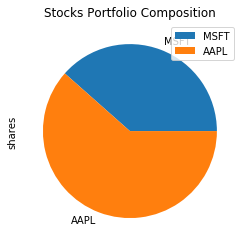

In [41]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_shares.plot.pie(y="shares", title="Stocks Portfolio Composition")

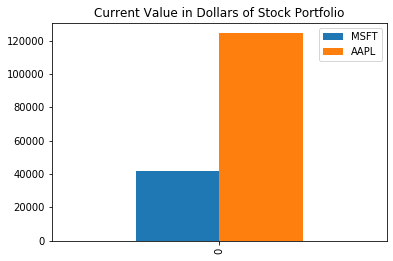

In [42]:
# Create a bar plot to show the value of shares
df_value.plot.bar(title="Current Value in Dollars of Stock Portfolio")